In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data_path = "/content/drive/MyDrive/LEAP_project/train_dataset.parquet"

In [4]:
LEAP_data = pd.read_parquet(train_data_path)

In [5]:
#input PROFILES:
temp_profiles = LEAP_data.iloc[:,1:61]

humidity_profiles = LEAP_data.iloc[:,61:121]
cloud_liquid_mixing_ratio_profiles = LEAP_data.iloc[:,121:181]
cloud_ice_mixing_ratio_profile = LEAP_data.iloc[:,181:241]

u_profile = LEAP_data.iloc[:,241:301]
v_profile = LEAP_data.iloc[:,301:361]

ozone = LEAP_data.iloc[:,377:437]
CH4 = LEAP_data.iloc[:,437:497]
N2O = LEAP_data.iloc[:,497:557]

#input SCALARS:
surface_pressure = LEAP_data.iloc[:,361]

solar_insolation = LEAP_data.iloc[:,362]
latent_hf = LEAP_data.iloc[:,363]
sensible_hf = LEAP_data.iloc[:,364]

zonal_stress = LEAP_data.iloc[:,365]
meridional_stress = LEAP_data.iloc[:,366]

zenith_angle = LEAP_data.iloc[:,367] #can be dropped, solar insolation is sufficient

albedo_diff_LW = LEAP_data.iloc[:,368]# just one albedo is sufficient
albedo_dir_LW = LEAP_data.iloc[:,369]
albedo_diff_SW = LEAP_data.iloc[:,370]
albedo_dir_SW = LEAP_data.iloc[:,371]

LW_flux_up = LEAP_data.iloc[:,372]

sea_ice_frac = LEAP_data.iloc[:,373]
land_frac = LEAP_data.iloc[:,374]# drop this, ocean_frac holds exact opposite information
ocean_frac = LEAP_data.iloc[:,375]
snow_depth = LEAP_data.iloc[:,376]

################################################################################
#output PROFILES:
temp_tend_prof = LEAP_data.iloc[:,557:617]

moist_tend_prof = LEAP_data.iloc[:,617:677]
liq_change_prof = LEAP_data.iloc[:,677:737]
ice_change_prof = LEAP_data.iloc[:,737:797]

u_acc_prof = LEAP_data.iloc[:,797:857]
v_acc_prof = LEAP_data.iloc[:,857:917]

#output SCALARS:
SW_flux = LEAP_data.iloc[:,917]

down_LW_flux = LEAP_data.iloc[:,918]

snow_rate = LEAP_data.iloc[:,919]
rain_rate = LEAP_data.iloc[:,920]

visible_solar = LEAP_data.iloc[:,921]
near_IR_flux = LEAP_data.iloc[:,922]
diff_solar = LEAP_data.iloc[:,923]
diff_IR = LEAP_data.iloc[:,924]

# 1. Visualizing the Data:



## Profiles:

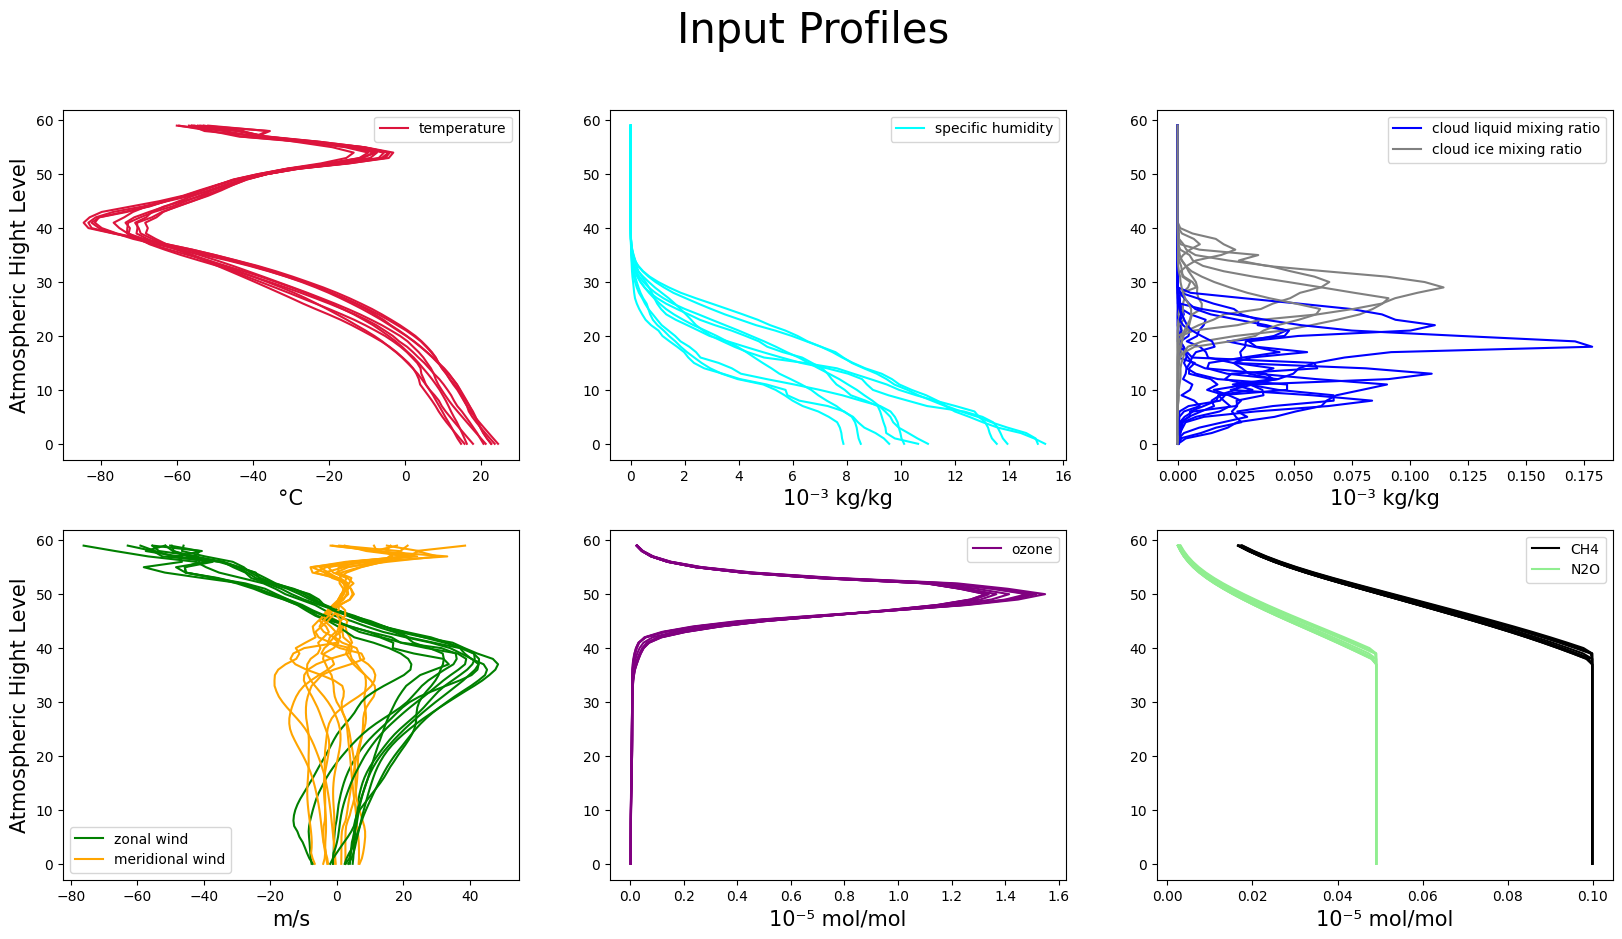

In [ ]:
plt.rcParams['figure.titlesize']  = 30
plt.rcParams['axes.labelsize']  = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
fig,ax = plt.subplots(2,3,figsize=[20,10])
for i in range(10):
    # Flip the temperature profile values
    flipped_temp = temp_profiles.values[i, ::-1]
    flipped_humid = humidity_profiles.values[i, ::-1]
    flipped_liq = cloud_liquid_mixing_ratio_profiles.values[i, ::-1]
    flipped_ice = cloud_ice_mixing_ratio_profile.values[i, ::-1]
    flipped_u = u_profile.values[i, ::-1]
    flipped_v = v_profile.values[i, ::-1]
    flipped_ozone = ozone.values[i, ::-1]
    flipped_CH4 = CH4.values[i, ::-1]
    flipped_N2O = N2O.values[i, ::-1]

    ax[0,1].set_xlabel("10⁻³ kg/kg")
    ax[0,2].set_xlabel("10⁻³ kg/kg")
    if i == 0:
        ax[0,0].plot(flipped_temp - 273.15, np.arange(0, 60, 1),color="crimson",label="temperature")
        ax[0,1].plot(flipped_humid*10**3, np.arange(0, 60, 1),color="cyan",label="specific humidity")
        ax[0,2].plot(flipped_liq*10**3, np.arange(0, 60, 1),color="Blue",label="cloud liquid mixing ratio")
        ax[0,2].plot(flipped_ice*10**3, np.arange(0, 60, 1),color="Gray",label="cloud ice mixing ratio")
        ax[1,0].plot(flipped_u, np.arange(0, 60, 1),color="Green",label="zonal wind")
        ax[1,0].plot(flipped_v, np.arange(0, 60, 1),color="Orange",label="meridional wind")
        ax[1,1].plot(flipped_ozone*10**5, np.arange(0, 60, 1),color="Purple",label="ozone")
        ax[1,2].plot(flipped_CH4*10**5, np.arange(0, 60, 1),color="k",label="CH4")
        ax[1,2].plot(flipped_N2O*10**5, np.arange(0, 60, 1),color="Lightgreen",label="N2O")
    else:
        ax[0,0].plot(flipped_temp - 273.15, np.arange(0, 60, 1),color="crimson")
        ax[0,1].plot(flipped_humid*10**3, np.arange(0, 60, 1),color="cyan")
        ax[0,2].plot(flipped_liq*10**3, np.arange(0, 60, 1),color="Blue")
        ax[0,2].plot(flipped_ice*10**3, np.arange(0, 60, 1),color="Gray")
        ax[1,0].plot(flipped_u, np.arange(0, 60, 1),color="Green")
        ax[1,0].plot(flipped_v, np.arange(0, 60, 1),color="Orange")
        ax[1,2].plot(flipped_CH4*10**5, np.arange(0, 60, 1),color="k")
        ax[1,2].plot(flipped_N2O*10**5, np.arange(0, 60, 1),color="Lightgreen")
        ax[1,1].plot(flipped_ozone*10**5, np.arange(0, 60, 1),color="Purple")
    ax[0,0].set_xlabel("°C")
    ax[0,0].set_ylabel("Atmospheric Hight Level")
    ax[1,0].set_ylabel("Atmospheric Hight Level")
    ax[0,0].legend()
    ax[0,1].legend()
    ax[0,2].legend()
    ax[1,0].legend()
    ax[1,1].legend()
    ax[1,2].legend()
    ax[1,0].set_xlabel("m/s")
    ax[1,1].set_xlabel("10⁻⁵ mol/mol")
    ax[1,2].set_xlabel("10⁻⁵ mol/mol")
fig.suptitle("Input Profiles");

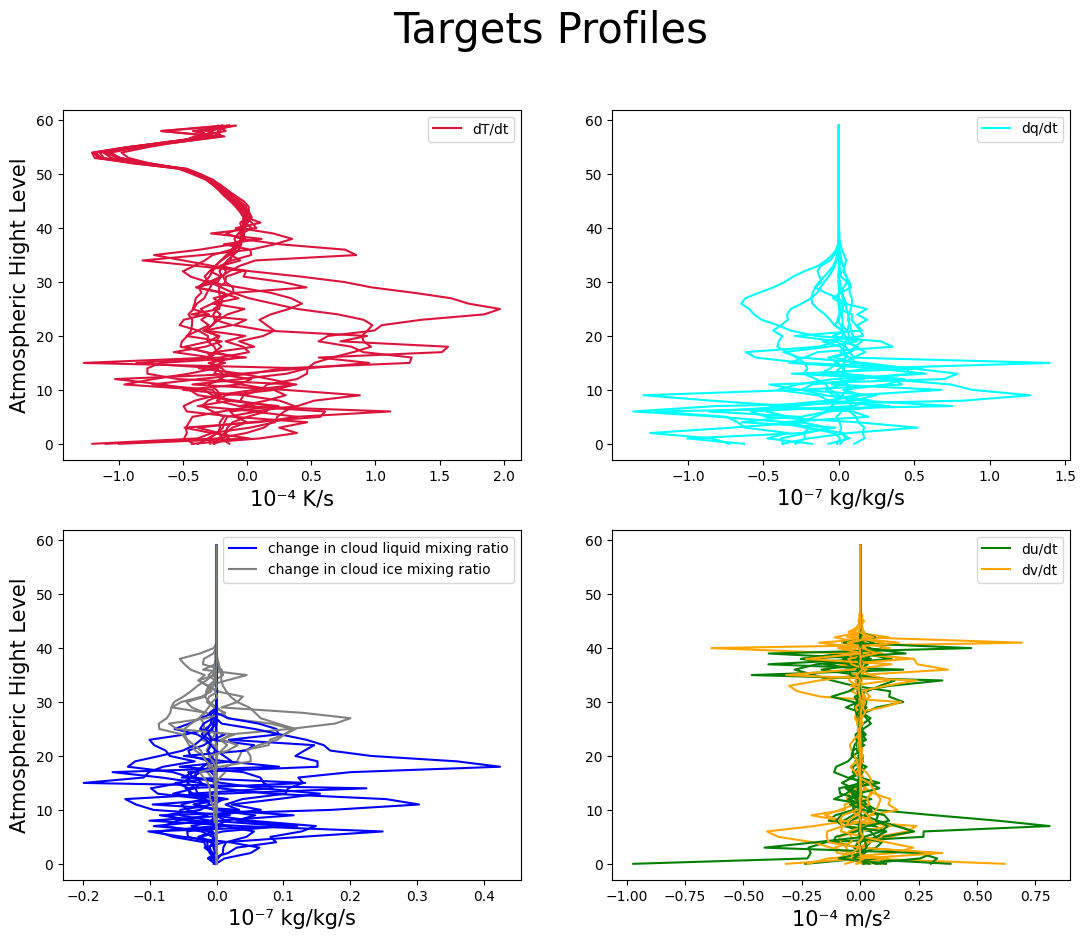

In [ ]:
fig,ax = plt.subplots(2,2,figsize=[13,10])
for i in range(10):
    # Flip the temperature profile values
    flipped_dTdt = temp_tend_prof.values[i, ::-1]
    flipped_dqdt = moist_tend_prof.values[i, ::-1]
    flipped_liq_change = liq_change_prof.values[i, ::-1]
    flipped_ice_change = ice_change_prof.values[i, ::-1]
    flipped_dudt = u_acc_prof.values[i, ::-1]
    flipped_dvdt = v_acc_prof.values[i, ::-1]


    if i == 0:
        ax[0,0].plot(flipped_dTdt*10**4, np.arange(0, 60, 1),color="crimson",label="dT/dt")
        ax[0,1].plot(flipped_dqdt*10**7, np.arange(0, 60, 1),color="cyan",label="dq/dt")
        ax[1,0].plot(flipped_liq_change*10**7, np.arange(0, 60, 1),color="Blue",label="change in cloud liquid mixing ratio")
        ax[1,0].plot(flipped_ice_change*10**7, np.arange(0, 60, 1),color="Gray",label="change in cloud ice mixing ratio")
        ax[1,1].plot(flipped_dudt*10**4, np.arange(0, 60, 1),color="Green",label="du/dt")
        ax[1,1].plot(flipped_dvdt*10**4, np.arange(0, 60, 1),color="Orange",label="dv/dt")
    else:
        ax[0,0].plot(flipped_dTdt*10**4, np.arange(0, 60, 1),color="crimson")
        ax[0,1].plot(flipped_dqdt*10**7, np.arange(0, 60, 1),color="cyan")
        ax[1,0].plot(flipped_liq_change*10**7, np.arange(0, 60, 1),color="Blue")
        ax[1,0].plot(flipped_ice_change*10**7, np.arange(0, 60, 1),color="Gray")
        ax[1,1].plot(flipped_dudt*10**4, np.arange(0, 60, 1),color="Green")
        ax[1,1].plot(flipped_dvdt*10**4, np.arange(0, 60, 1),color="Orange")

    ax[0,0].set_xlabel("10⁻⁴ K/s")
    ax[0,1].set_xlabel("10⁻⁷ kg/kg/s")
    ax[1,1].set_xlabel("10⁻⁴ m/s²")
    ax[1,0].set_xlabel("10⁻⁷ kg/kg/s")
    ax[0,0].set_ylabel("Atmospheric Hight Level")
    ax[1,0].set_ylabel("Atmospheric Hight Level")
    ax[0,0].legend()
    ax[0,1].legend()
    ax[1,0].legend()
    ax[1,1].legend()
fig.suptitle("Targets Profiles");

## Scalars:

Text(0.5, 0.98, 'Input Scalars')

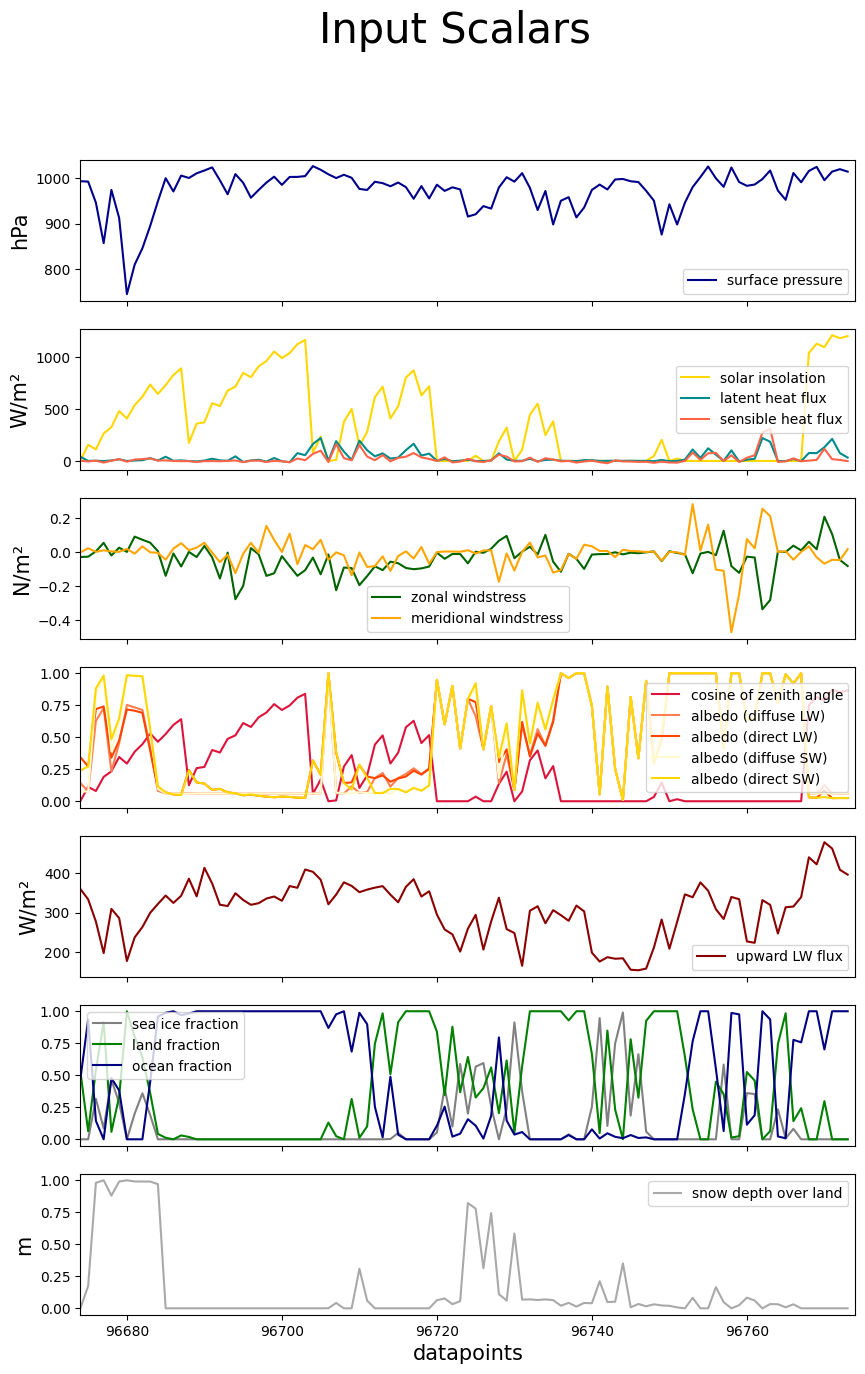

In [ ]:
import random
start_point = random.randint(0, 99900)

fig,ax = plt.subplots(7,1,figsize=[10,15],sharex=True)
ax[0].plot(surface_pressure[start_point:start_point+100]*10**(-2),color="darkblue",label="surface pressure")
ax[0].set_ylabel("hPa")
ax[0].legend()

ax[1].plot(solar_insolation[start_point:start_point+100],color="gold",label="solar insolation")
ax[1].plot(latent_hf[start_point:start_point+100],color="darkcyan",label="latent heat flux")
ax[1].plot(sensible_hf[start_point:start_point+100],color="tomato",label="sensible heat flux")
ax[1].set_ylabel("W/m²")
ax[1].legend()

ax[2].plot(zonal_stress[start_point:start_point+100],color="darkgreen",label="zonal windstress")
ax[2].plot(meridional_stress[start_point:start_point+100],color="Orange",label="meridional windstress")
ax[2].set_ylabel("N/m²")
ax[2].legend()

ax[3].plot(zenith_angle[start_point:start_point+100],color="crimson",label="cosine of zenith angle")
ax[3].plot(albedo_diff_LW[start_point:start_point+100],color="coral",label="albedo (diffuse LW)")
ax[3].plot(albedo_dir_LW[start_point:start_point+100],color="orangered",label="albedo (direct LW)")
ax[3].plot(albedo_diff_SW[start_point:start_point+100],color="lemonchiffon",label="albedo (diffuse SW)")
ax[3].plot(albedo_dir_SW[start_point:start_point+100],color="gold",label="albedo (direct SW)")
ax[3].legend()

ax[4].plot(LW_flux_up[start_point:start_point+100],color="darkred",label="upward LW flux")
ax[4].set_ylabel("W/m²")
ax[4].legend()

ax[5].plot(sea_ice_frac[start_point:start_point+100],color="gray",label="sea ice fraction")
ax[5].plot(land_frac[start_point:start_point+100],color="green",label="land fraction")
ax[5].plot(ocean_frac[start_point:start_point+100],color="navy",label="ocean fraction")
ax[5].legend()

ax[6].plot(snow_depth[start_point:start_point+100],color="darkgrey",label="snow depth over land")
ax[6].set_ylabel("m")
ax[6].legend()
ax[6].set_xlabel("datapoints")
ax[6].set_xlim(start_point,start_point+100)

fig.suptitle("Input Scalars")

Text(0.5, 0.98, 'Target Scalars')

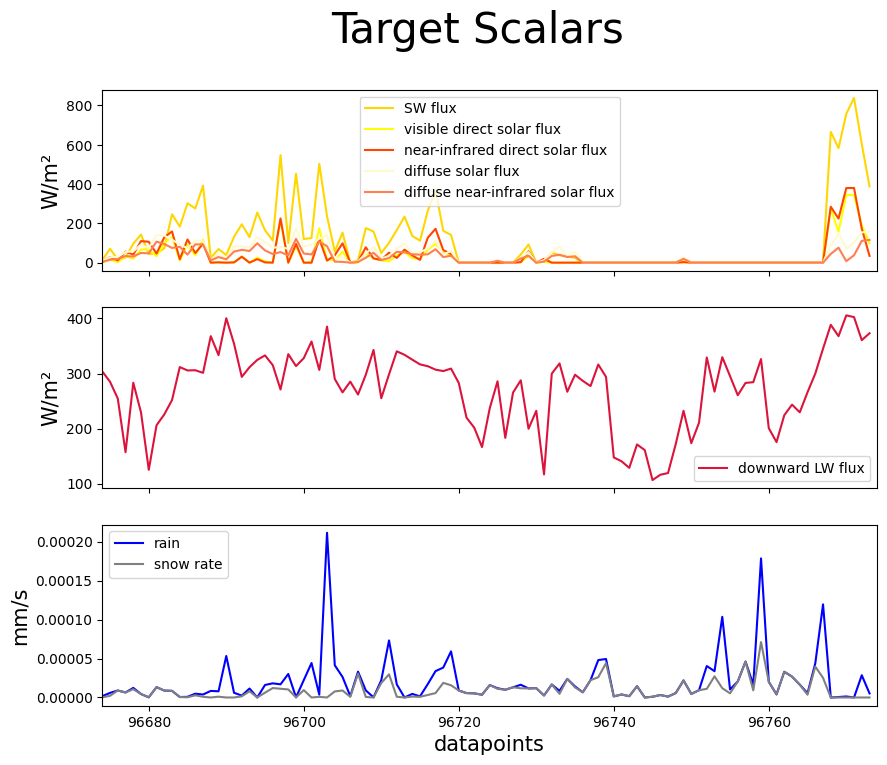

In [ ]:
fig,ax = plt.subplots(3,1,figsize=[10,8],sharex=True)
ax[0].plot(SW_flux[start_point:start_point+100],color="gold",label="SW flux")
ax[0].plot(visible_solar[start_point:start_point+100],color="yellow",label="visible direct solar flux")
ax[0].plot(near_IR_flux[start_point:start_point+100],color="orangered",label="near-infrared direct solar flux")
ax[0].plot(diff_solar[start_point:start_point+100],color="lemonchiffon",label="diffuse solar flux")
ax[0].plot(diff_IR[start_point:start_point+100],color="coral",label="diffuse near-infrared solar flux")
ax[0].set_ylabel("W/m²")
ax[0].legend()

ax[1].plot(down_LW_flux[start_point:start_point+100],color="crimson",label="downward LW flux")
ax[1].set_ylabel("W/m²")
ax[1].legend()

ax[2].plot(rain_rate[start_point:start_point+100]*10**3,color="blue",label="rain")
ax[2].plot(snow_rate[start_point:start_point+100]*10**3,color="grey",label="snow rate")
ax[2].set_ylabel("mm/s")
ax[2].legend()
ax[2].set_xlabel("datapoints")
ax[2].set_xlim(start_point,start_point+100)


fig.suptitle("Target Scalars")

# 2. Correlation analysis:

## Input profiles on target profiles:

### Input profiles for heating tendency (dT/dt):

In [42]:
profile_dTdt_data = LEAP_data.iloc[:,list(np.arange(1,361))+list(np.arange(377,557))+list(np.arange(557,617))]

correlation_matrix_profile_dTdt = profile_dTdt_data.corr()

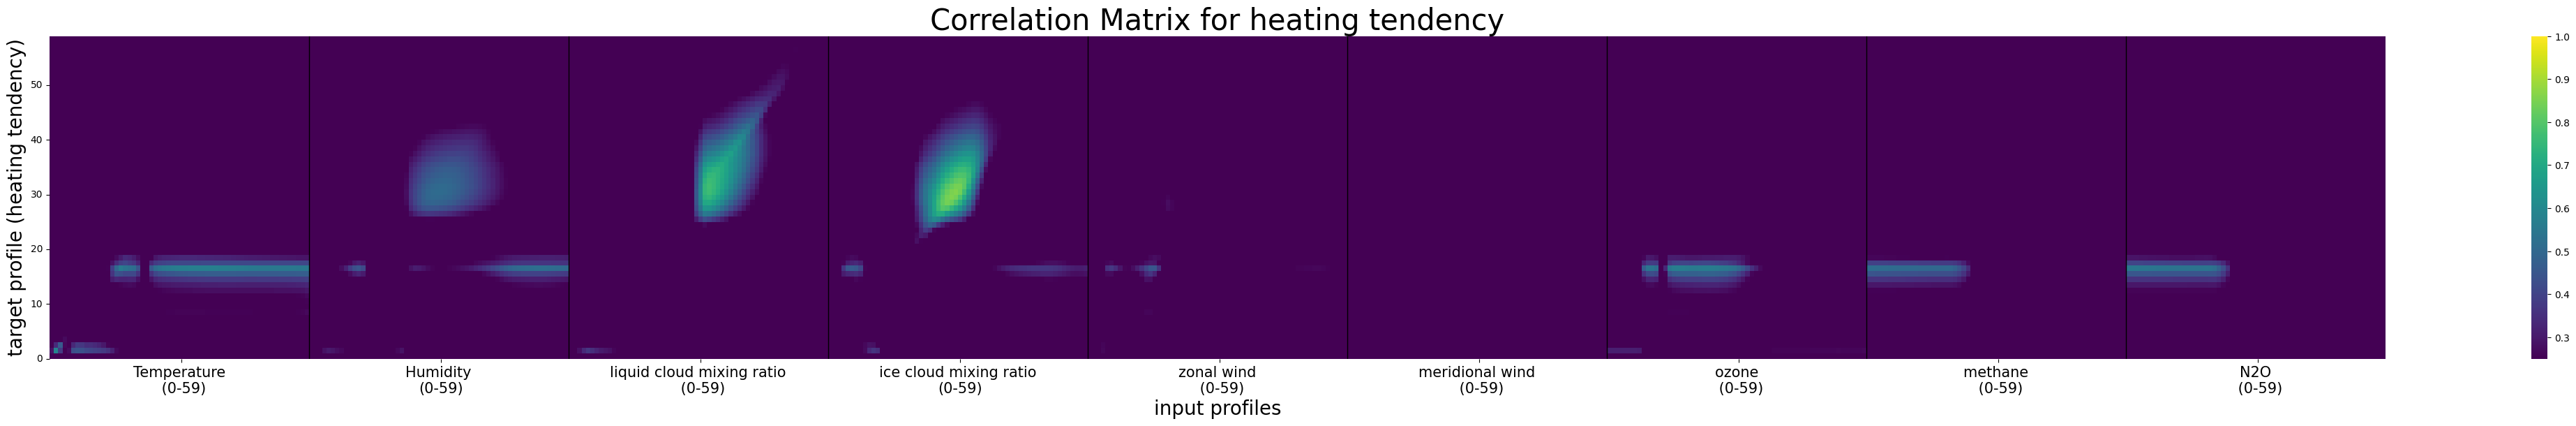

In [48]:
plt.rcParams["axes.facecolor"]=(68/256,1/256,84/256)
plt.figure(figsize=(54, 6))
sns.heatmap(np.abs(correlation_matrix_profile_dTdt), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for heating tendency',fontsize=30)
plt.xlim(0,540)
plt.ylim(540,599)
plt.ylabel("target profile (heating tendency)",fontsize=20)
plt.yticks(ticks = np.arange(540,599,10),labels=np.arange(0,60,10))
plt.xlabel("input profiles",fontsize=20)
plt.xticks(ticks=np.arange(30.5,9*60,60),
           labels=["Temperature \n (0-59)","Humidity \n(0-59)","liquid cloud mixing ratio \n (0-59)","ice cloud mixing ratio \n(0-59)","zonal wind \n (0-59)","meridional wind \n (0-59)","ozone \n (0-59)","methane \n (0-59)","N2O \n (0-59)"],
           rotation="horizontal",fontsize=15)
for i in np.arange(60,540,60):
  plt.plot([i,i],[540,599],color="k",lw=1)
plt.show()

### Input profiles for dq/dt:

In [44]:
profile_dqdt_data = LEAP_data.iloc[:,list(np.arange(1,361))+list(np.arange(377,557))+list(np.arange(617,677))]

correlation_matrix_profile_dqdt = profile_dqdt_data.corr()

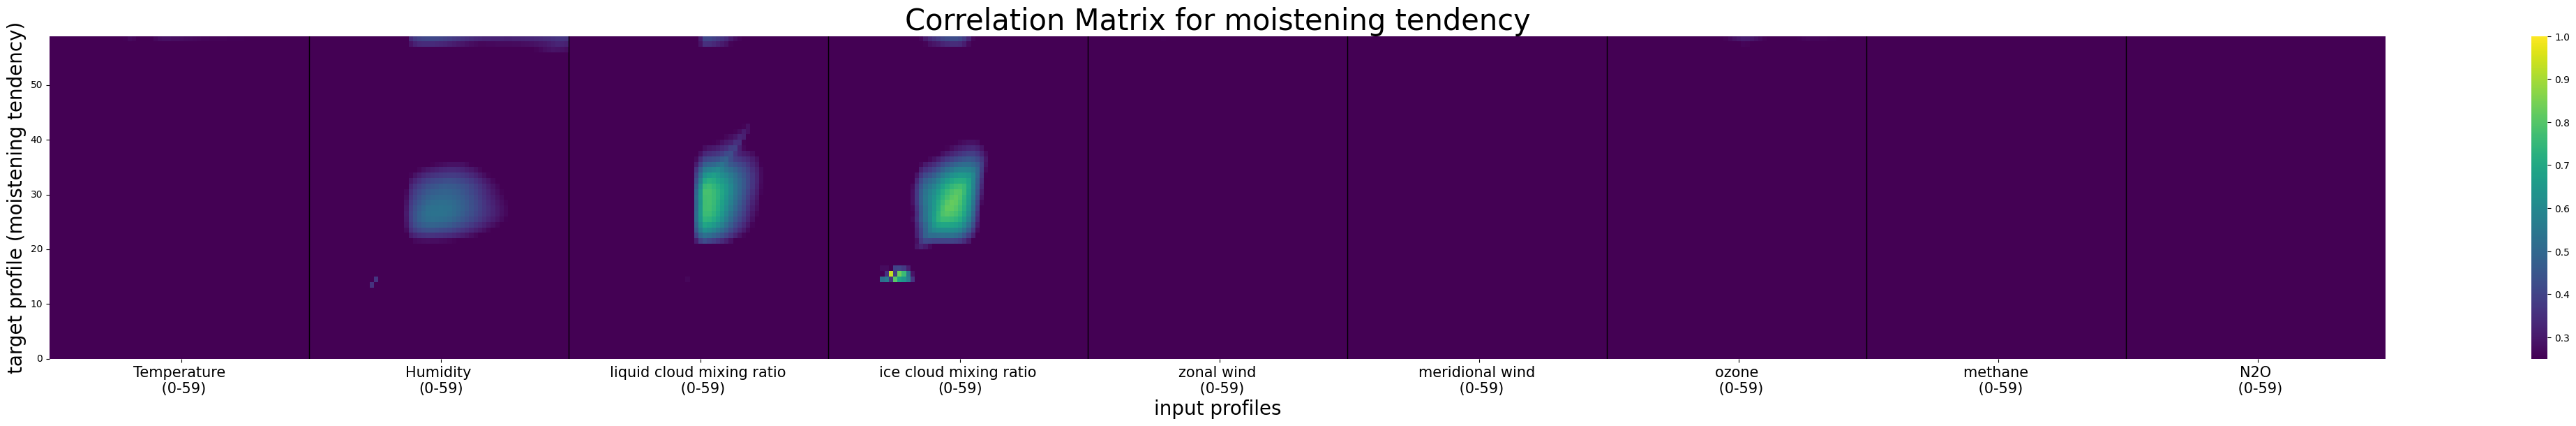

In [50]:
plt.rcParams["axes.facecolor"]=(68/256,1/256,84/256)
plt.figure(figsize=(54, 6))
sns.heatmap(np.abs(correlation_matrix_profile_dqdt), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for moistening tendency',fontsize=30)
plt.xlim(0,540)
plt.ylim(540,599)
plt.ylabel("target profile (moistening tendency)",fontsize=20)
plt.yticks(ticks = np.arange(540,599,10),labels=np.arange(0,60,10))
plt.xlabel("input profiles",fontsize=20)
plt.xticks(ticks=np.arange(30.5,9*60,60),
           labels=["Temperature \n (0-59)","Humidity \n(0-59)","liquid cloud mixing ratio \n (0-59)","ice cloud mixing ratio \n(0-59)","zonal wind \n (0-59)","meridional wind \n (0-59)","ozone \n (0-59)","methane \n (0-59)","N2O \n (0-59)"],
           rotation="horizontal",fontsize=15)
for i in np.arange(60,540,60):
  plt.plot([i,i],[540,599],color="k",lw=1)
plt.show()

### Input profiles for liquid cloud ratio change:

In [49]:
profile_dliqdt_data = LEAP_data.iloc[:,list(np.arange(1,361))+list(np.arange(377,557))+list(np.arange(677,737))]

correlation_matrix_profile_dliqdt = profile_dliqdt_data.corr()

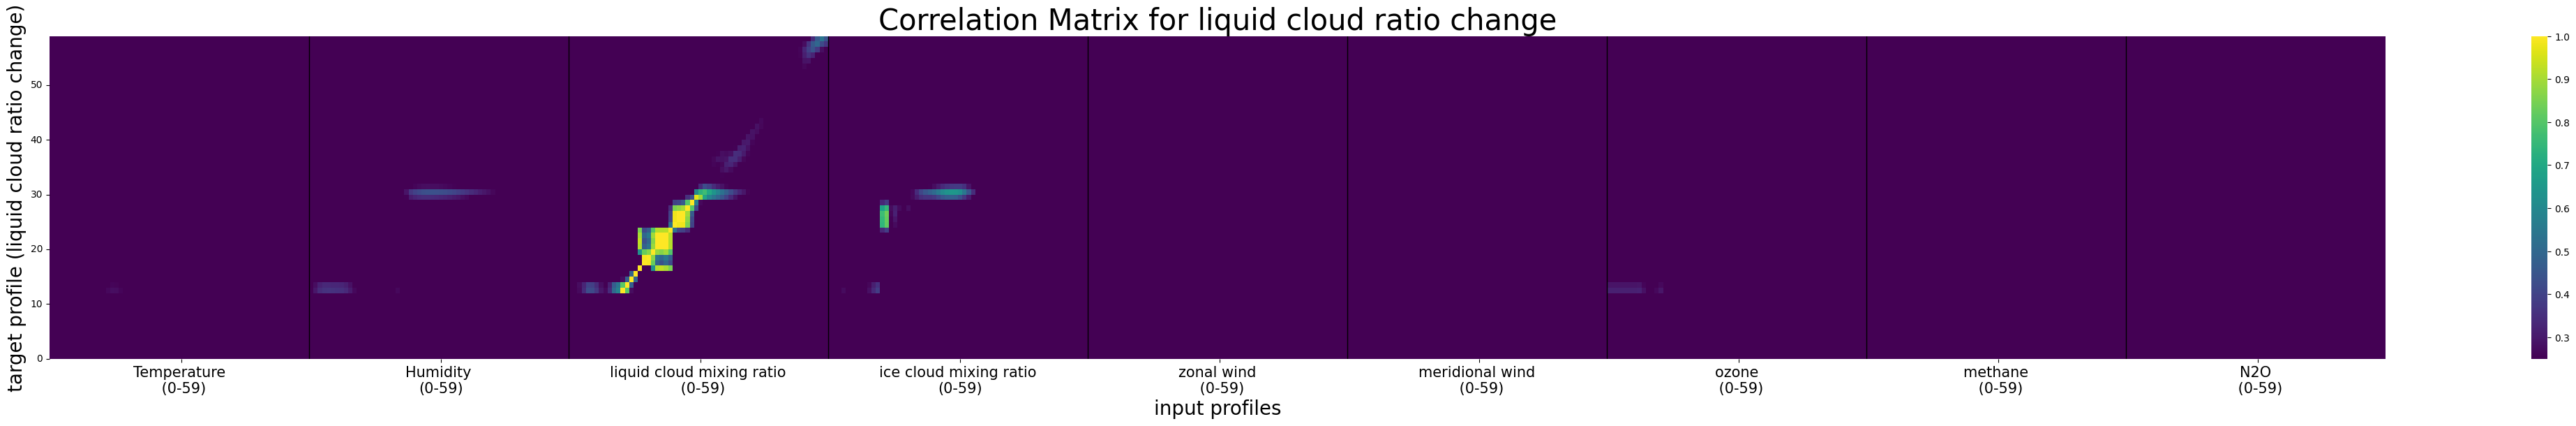

In [51]:
plt.rcParams["axes.facecolor"]=(68/256,1/256,84/256)
plt.figure(figsize=(54, 6))
sns.heatmap(np.abs(correlation_matrix_profile_dliqdt), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for liquid cloud ratio change',fontsize=30)
plt.xlim(0,540)
plt.ylim(540,599)
plt.ylabel("target profile (liquid cloud ratio change)",fontsize=20)
plt.yticks(ticks = np.arange(540,599,10),labels=np.arange(0,60,10))
plt.xlabel("input profiles",fontsize=20)
plt.xticks(ticks=np.arange(30.5,9*60,60),
           labels=["Temperature \n (0-59)","Humidity \n(0-59)","liquid cloud mixing ratio \n (0-59)","ice cloud mixing ratio \n(0-59)","zonal wind \n (0-59)","meridional wind \n (0-59)","ozone \n (0-59)","methane \n (0-59)","N2O \n (0-59)"],
           rotation="horizontal",fontsize=15)
for i in np.arange(60,540,60):
  plt.plot([i,i],[540,599],color="k",lw=1)
plt.show()

### Input profiles for ice cloud ratio change:

In [52]:
profile_dicedt_data = LEAP_data.iloc[:,list(np.arange(1,361))+list(np.arange(377,557))+list(np.arange(737,797))]

correlation_matrix_profile_dicedt = profile_dicedt_data.corr()

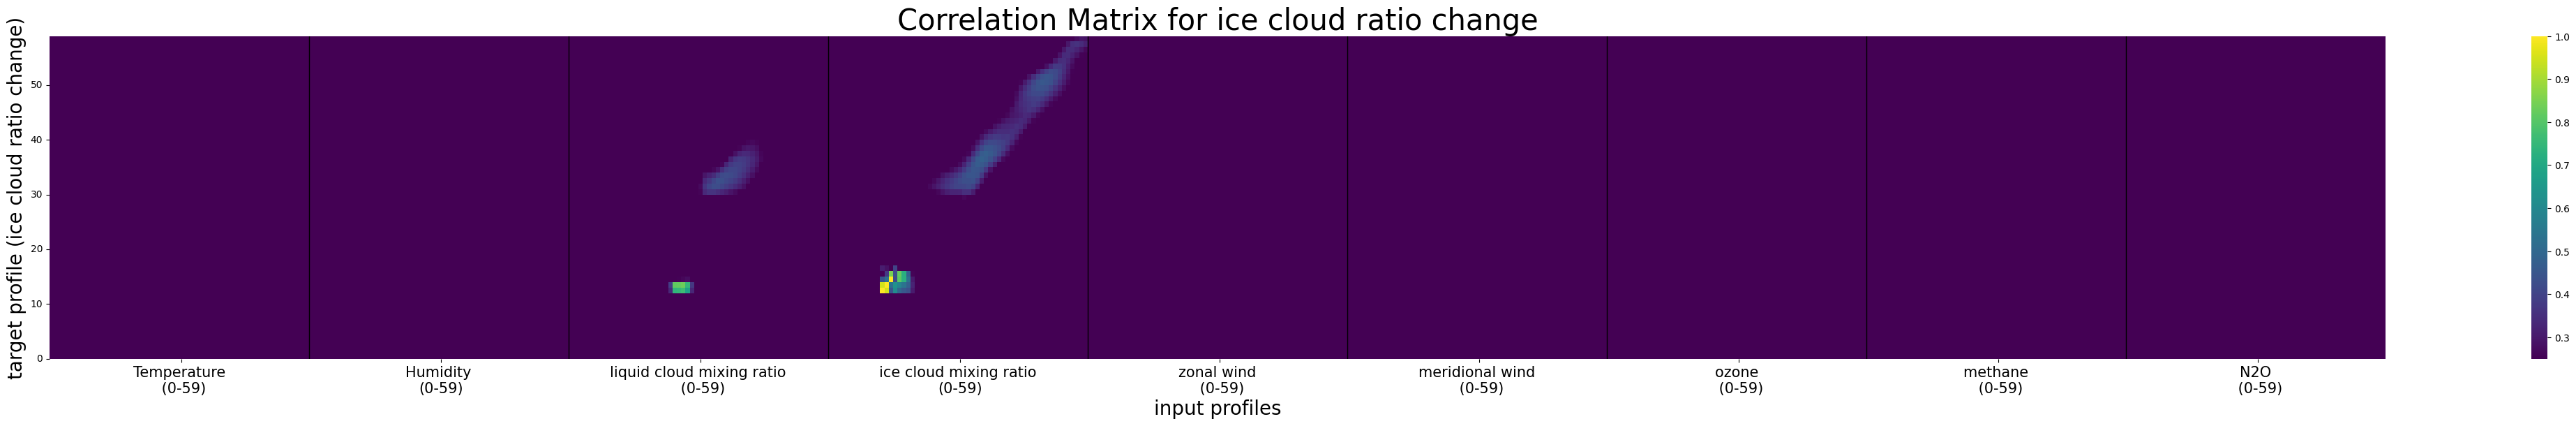

In [53]:
plt.figure(figsize=(54, 6))
sns.heatmap(np.abs(correlation_matrix_profile_dicedt), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for ice cloud ratio change',fontsize=30)
plt.xlim(0,540)
plt.ylim(540,599)
plt.ylabel("target profile (ice cloud ratio change)",fontsize=20)
plt.yticks(ticks = np.arange(540,599,10),labels=np.arange(0,60,10))
plt.xlabel("input profiles",fontsize=20)
plt.xticks(ticks=np.arange(30.5,9*60,60),
           labels=["Temperature \n (0-59)","Humidity \n(0-59)","liquid cloud mixing ratio \n (0-59)","ice cloud mixing ratio \n(0-59)","zonal wind \n (0-59)","meridional wind \n (0-59)","ozone \n (0-59)","methane \n (0-59)","N2O \n (0-59)"],
           rotation="horizontal",fontsize=15)
for i in np.arange(60,540,60):
  plt.plot([i,i],[540,599],color="k",lw=1)
plt.show()

### Input profiles for zonal acceleration (du/dt):

In [54]:
profile_dudt_data = LEAP_data.iloc[:,list(np.arange(1,361))+list(np.arange(377,557))+list(np.arange(797,857))]

correlation_matrix_profile_dudt = profile_dudt_data.corr()

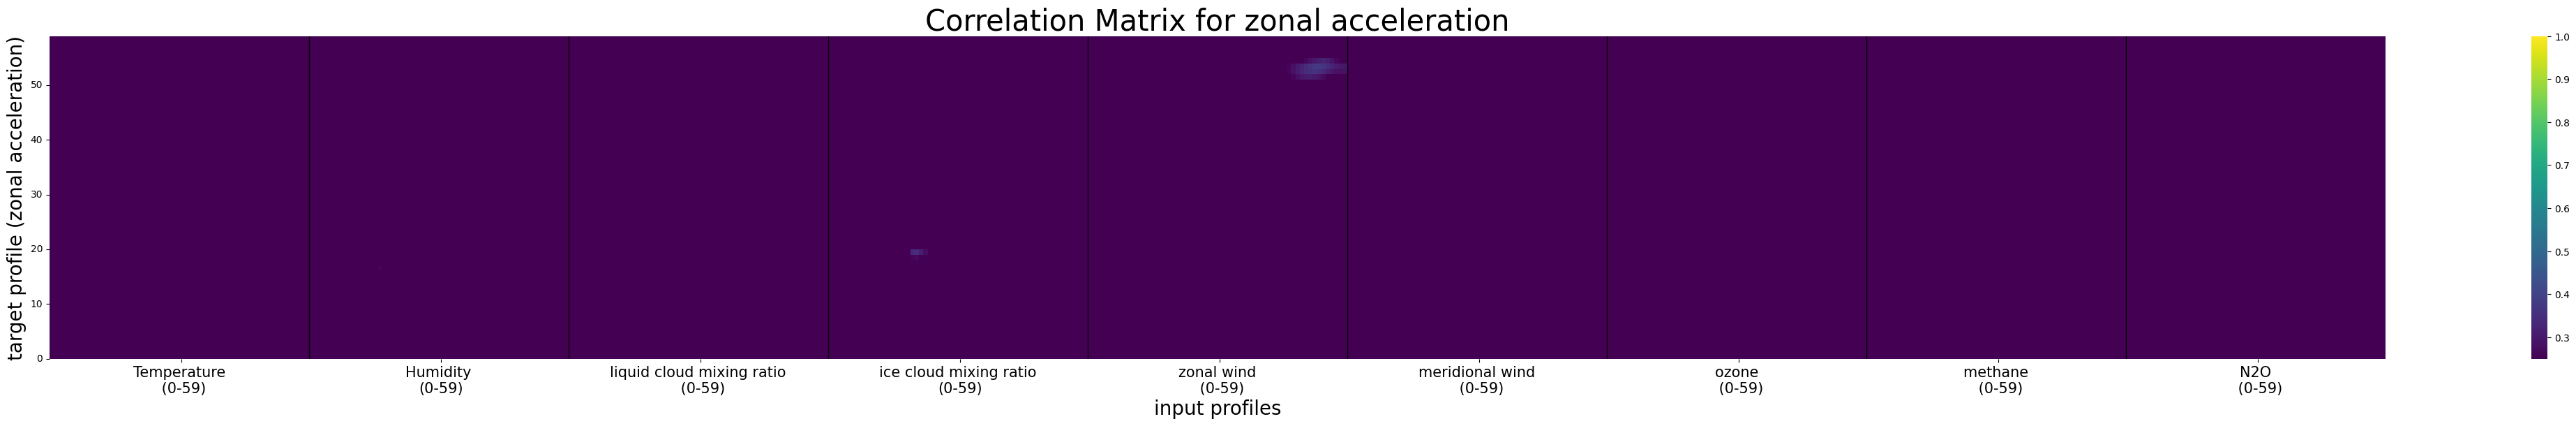

In [55]:
plt.figure(figsize=(54, 6))
sns.heatmap(np.abs(correlation_matrix_profile_dudt), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for zonal acceleration',fontsize=30)
plt.xlim(0,540)
plt.ylim(540,599)
plt.ylabel("target profile (zonal acceleration)",fontsize=20)
plt.yticks(ticks = np.arange(540,599,10),labels=np.arange(0,60,10))
plt.xlabel("input profiles",fontsize=20)
plt.xticks(ticks=np.arange(30.5,9*60,60),
           labels=["Temperature \n (0-59)","Humidity \n(0-59)","liquid cloud mixing ratio \n (0-59)","ice cloud mixing ratio \n(0-59)","zonal wind \n (0-59)","meridional wind \n (0-59)","ozone \n (0-59)","methane \n (0-59)","N2O \n (0-59)"],
           rotation="horizontal",fontsize=15)
for i in np.arange(60,540,60):
  plt.plot([i,i],[540,599],color="k",lw=1)
plt.show()

### Input profiles for meridional acceleration (dv/dt):

In [56]:
profile_dvdt_data = LEAP_data.iloc[:,list(np.arange(1,361))+list(np.arange(377,557))+list(np.arange(857,917))]

correlation_matrix_profile_dvdt = profile_dvdt_data.corr()

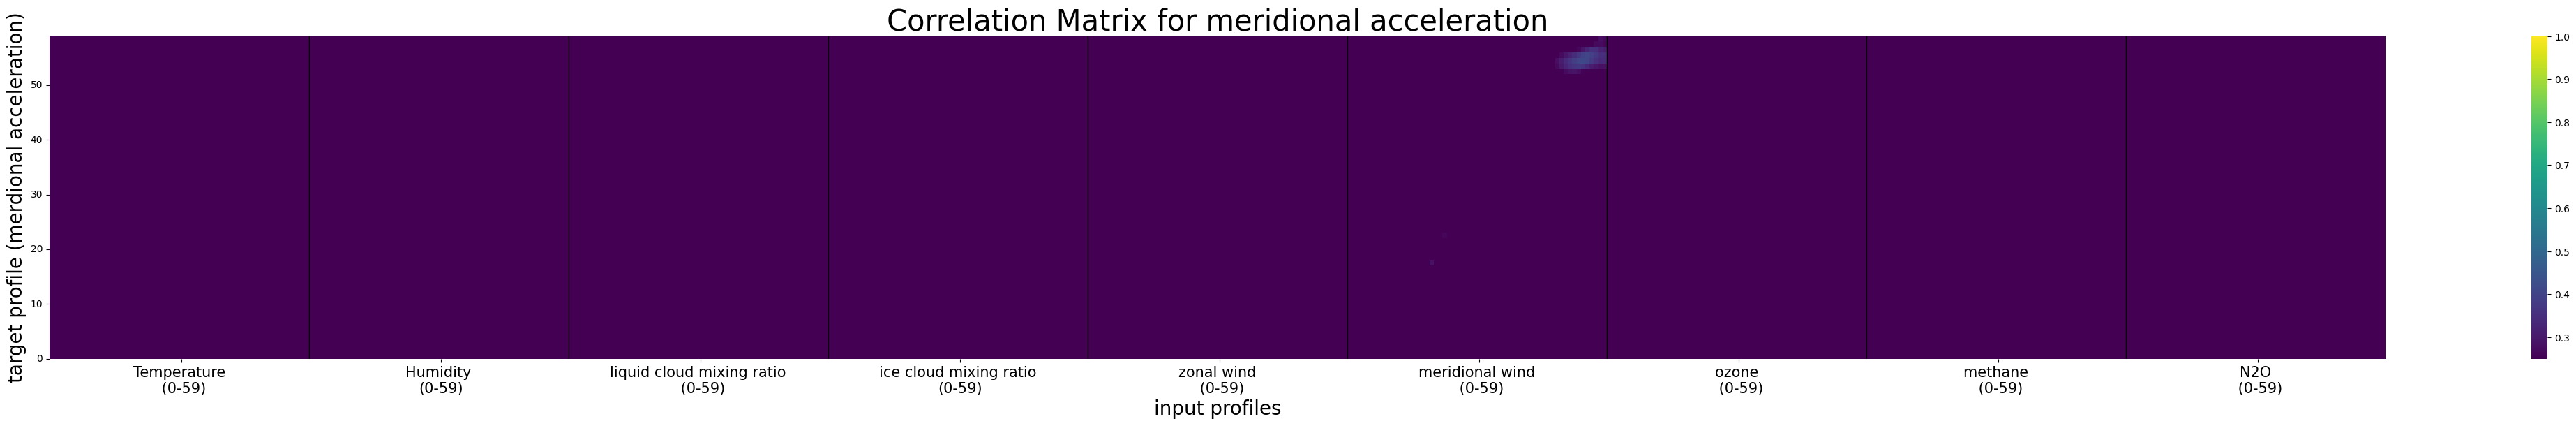

In [57]:
plt.figure(figsize=(54, 6))
sns.heatmap(np.abs(correlation_matrix_profile_dvdt), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for meridional acceleration',fontsize=30)
plt.xlim(0,540)
plt.ylim(540,599)
plt.ylabel("target profile (merdional acceleration)",fontsize=20)
plt.yticks(ticks = np.arange(540,599,10),labels=np.arange(0,60,10))
plt.xlabel("input profiles",fontsize=20)
plt.xticks(ticks=np.arange(30.5,9*60,60),
           labels=["Temperature \n (0-59)","Humidity \n(0-59)","liquid cloud mixing ratio \n (0-59)","ice cloud mixing ratio \n(0-59)","zonal wind \n (0-59)","meridional wind \n (0-59)","ozone \n (0-59)","methane \n (0-59)","N2O \n (0-59)"],
           rotation="horizontal",fontsize=15)
for i in np.arange(60,540,60):
  plt.plot([i,i],[540,599],color="k",lw=1)
plt.show()

## Input profiles on target scalars:

In [66]:
profile_on_scalar_data = LEAP_data.iloc[:,list(np.arange(1,361))+list(np.arange(377,557))+list(np.arange(917,925))]

correlation_matrix_profile_scalar = profile_on_scalar_data.corr()

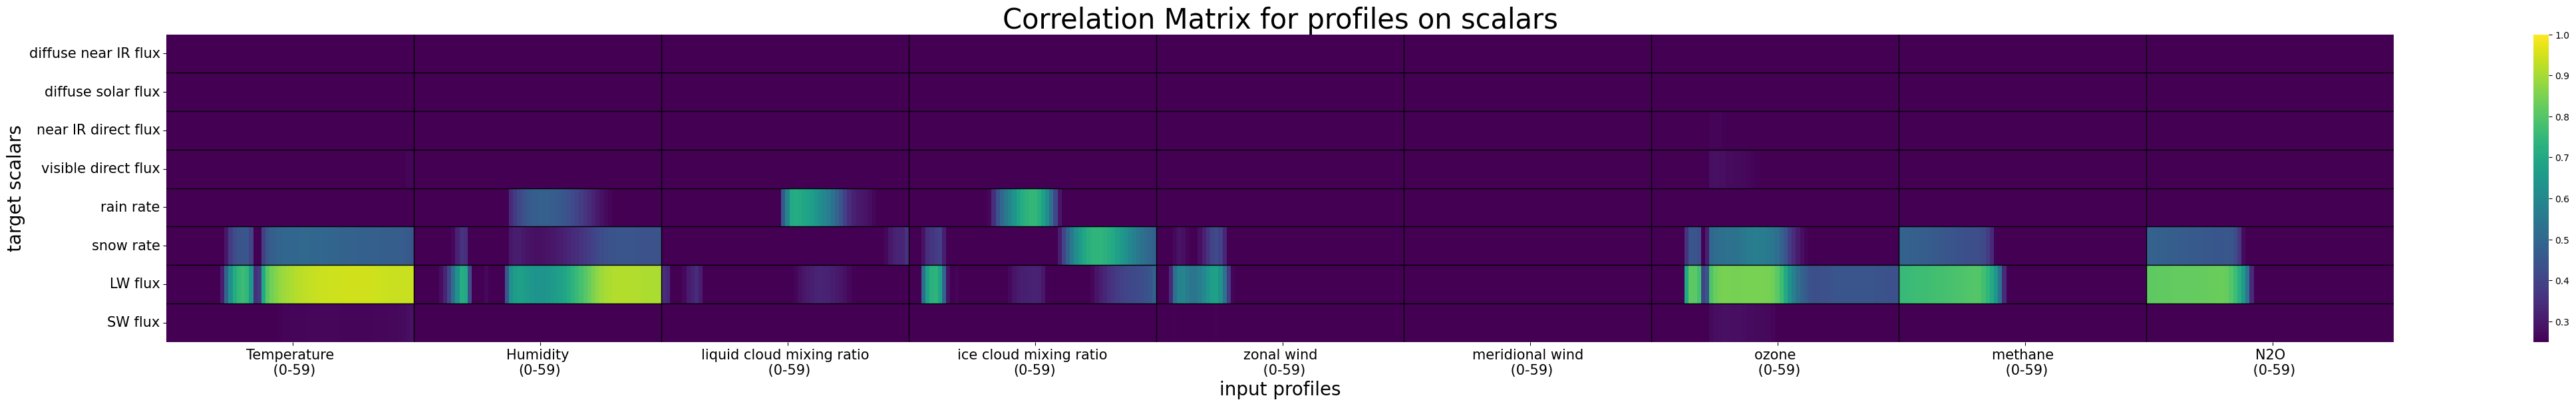

In [73]:
plt.rcParams["axes.facecolor"]=(68/256,1/256,84/256)
plt.figure(figsize=(54, 6))
sns.heatmap(np.abs(correlation_matrix_profile_scalar), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for profiles on scalars',fontsize=30)
plt.xlim(0,540)
plt.ylim(540,548)
plt.ylabel("target scalars",fontsize=20)
plt.yticks(ticks=np.arange(540.5,548,1),
            labels=["SW flux","LW flux","snow rate","rain rate","visible direct flux","near IR direct flux","diffuse solar flux","diffuse near IR flux"],
           fontsize=15)
plt.xlabel("input profiles",fontsize=20)
plt.xticks(ticks=np.arange(30.5,9*60,60),
           labels=["Temperature \n (0-59)","Humidity \n(0-59)","liquid cloud mixing ratio \n (0-59)","ice cloud mixing ratio \n(0-59)","zonal wind \n (0-59)","meridional wind \n (0-59)","ozone \n (0-59)","methane \n (0-59)","N2O \n (0-59)"],
           rotation="horizontal",fontsize=15)
for i in np.arange(60,540,60):
  plt.plot([i,i],[540,599],color="k",lw=1)
for j in range(7):
  plt.plot([0,540],[j+541,j+541],color="k",lw=1)
plt.show()

## Input scalars on target profiles:

In [72]:
scalar_on_profile_data = LEAP_data.iloc[:,list(np.arange(361,377))+list(np.arange(557,917))]#input scalars + target profiles

correlation_matrix_scalar_profile = scalar_on_profile_data.corr()

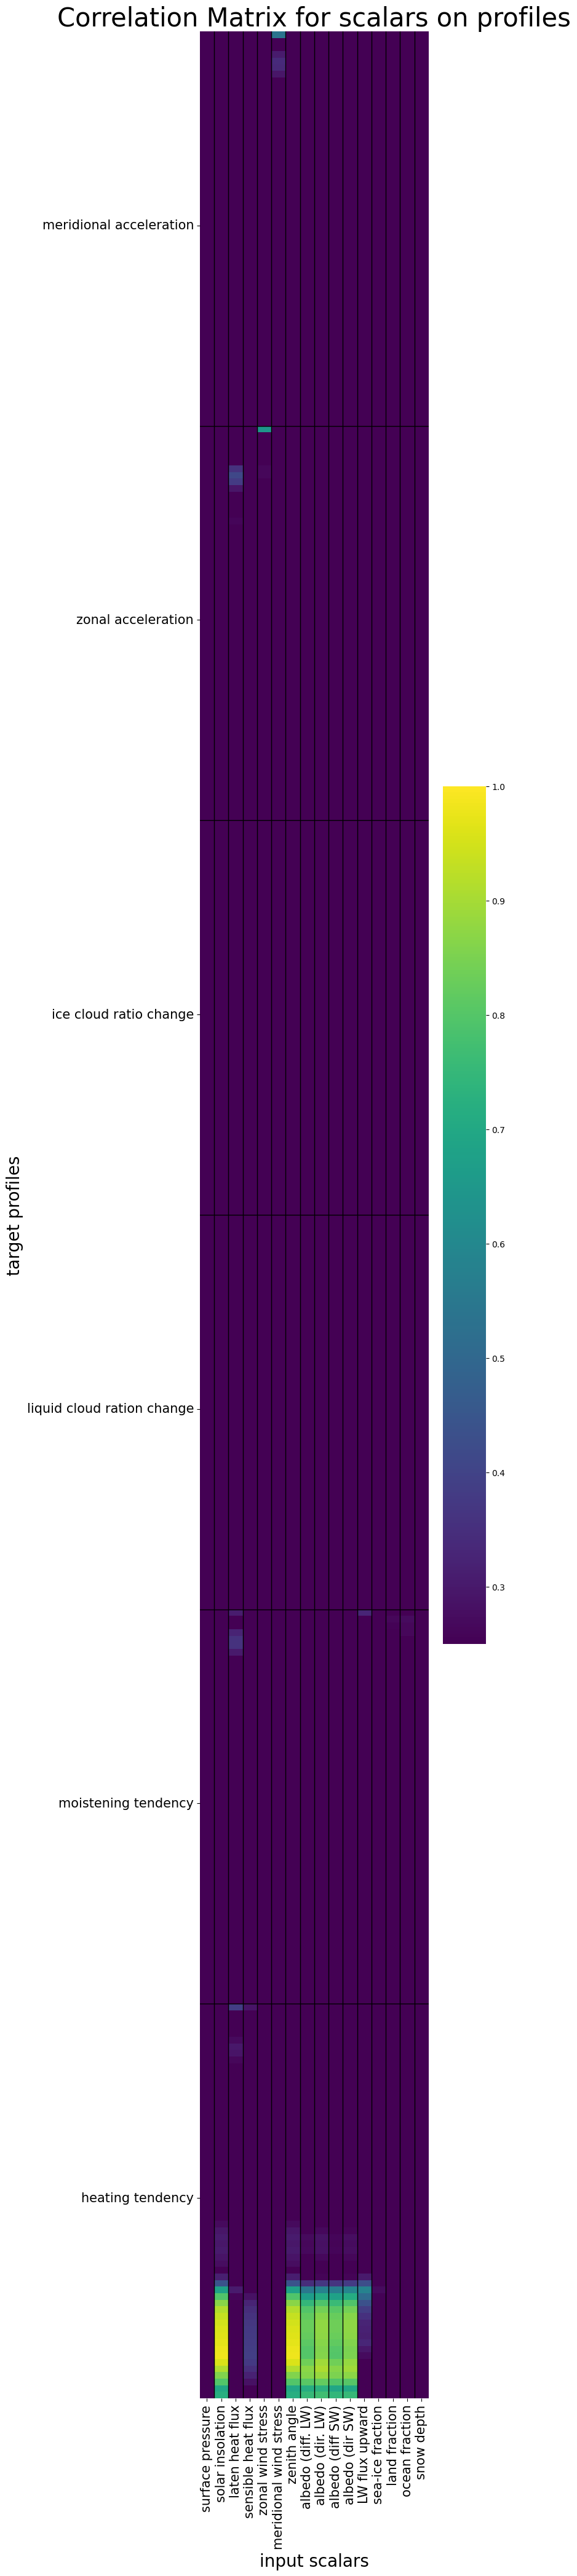

In [93]:
plt.figure(figsize=(6, 50))
sns.heatmap(np.abs(correlation_matrix_scalar_profile), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for scalars on profiles',fontsize=30)
plt.xlim(0,16)
plt.ylim(16,376)
plt.ylabel("target profiles",fontsize=20)
plt.yticks(ticks=np.arange(46.5,376,60),
            labels=["heating tendency","moistening tendency","liquid cloud ration change","ice cloud ratio change",
                    "zonal acceleration","meridional acceleration"],
           fontsize=15)
plt.xlabel("input scalars",fontsize=20)
plt.xticks(ticks=np.arange(0.5,16,1),
           labels=["surface pressure","solar insolation","laten heat flux","sensible heat flux",
                   "zonal wind stress","meridional wind stress","zenith angle","albedo (diff. LW)",
                   "albedo (dir. LW)","albedo (diff SW)", "albedo (dir SW)", "LW flux upward",
                   "sea-ice fraction", "land fraction","ocean fraction","snow depth"],
           fontsize=15)
for i in range(15):
  plt.plot([i+1,i+1],[16,376],color="k",lw=1)
for j in np.arange(76,376,60):
  plt.plot([0,16],[j,j],color="k",lw=1)
plt.show()

## Input scalars on target scalars:

In [94]:
scalar_on_scalar_data = LEAP_data.iloc[:,list(np.arange(361,377))+list(np.arange(917,925))]#input scalars + target scalars

correlation_matrix_scalar_scalar = scalar_on_scalar_data.corr()

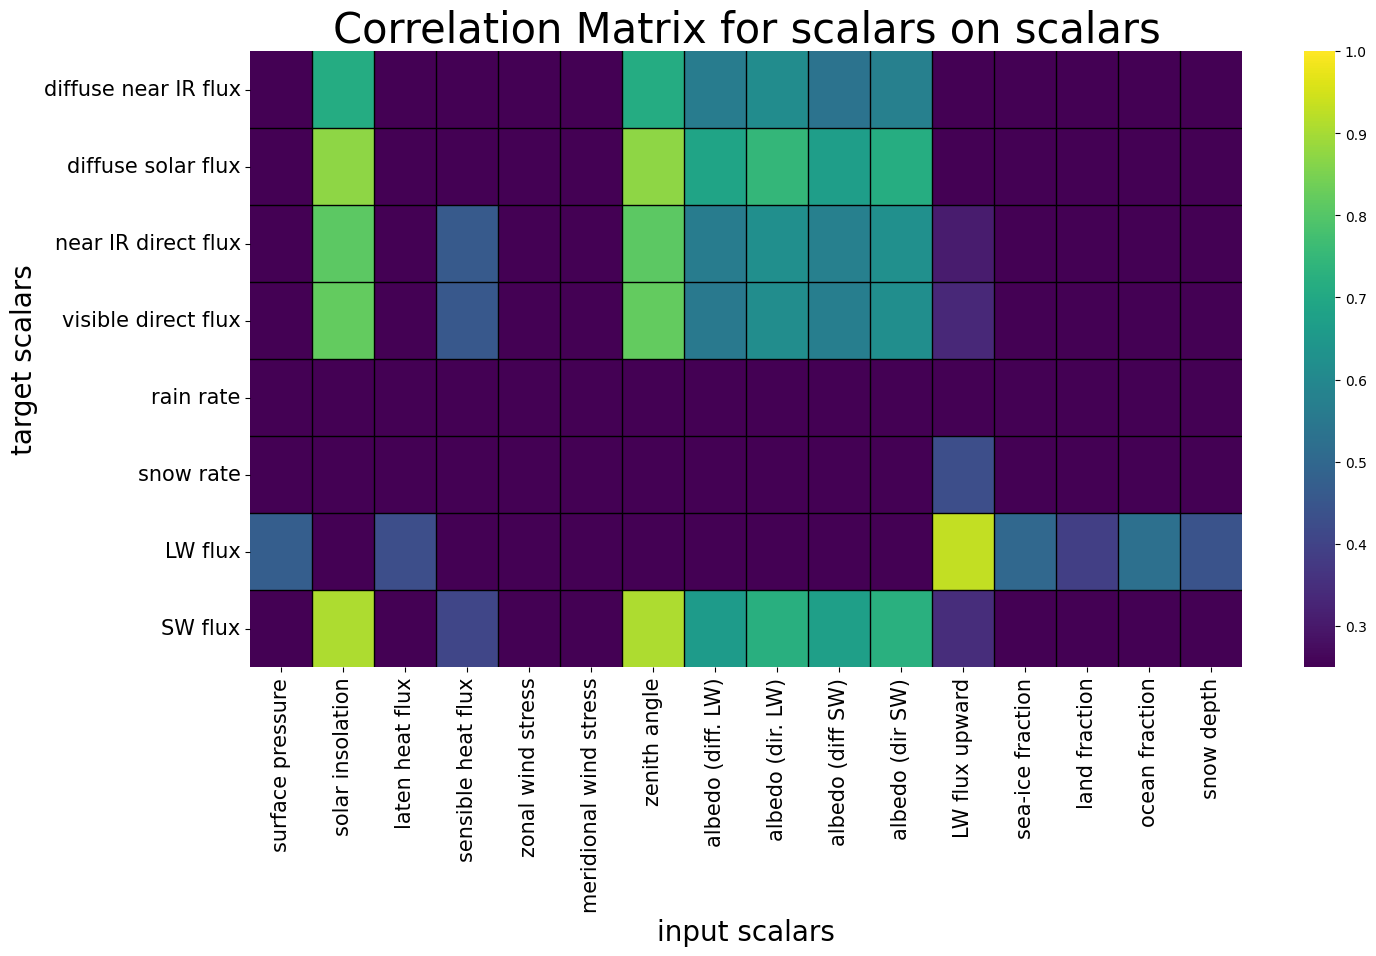

In [97]:
plt.figure(figsize=(16, 8))
sns.heatmap(np.abs(correlation_matrix_scalar_scalar), annot=False, cmap='viridis',vmin=0.25, fmt='.2f')
plt.title('Correlation Matrix for scalars on scalars',fontsize=30)
plt.xlim(0,16)
plt.ylim(16,24)
plt.ylabel("target scalars",fontsize=20)
plt.yticks(ticks=np.arange(16.5,24,1),
           labels=["SW flux","LW flux","snow rate","rain rate","visible direct flux","near IR direct flux","diffuse solar flux","diffuse near IR flux"],
           fontsize=15)
plt.xlabel("input scalars",fontsize=20)
plt.xticks(ticks=np.arange(0.5,16,1),
           labels=["surface pressure","solar insolation","laten heat flux","sensible heat flux",
                   "zonal wind stress","meridional wind stress","zenith angle","albedo (diff. LW)",
                   "albedo (dir. LW)","albedo (diff SW)", "albedo (dir SW)", "LW flux upward",
                   "sea-ice fraction", "land fraction","ocean fraction","snow depth"],
           fontsize=15)
for i in range(15):
  plt.plot([i+1,i+1],[16,24],color="k",lw=1)
for j in range(7):
  plt.plot([0,16],[j+17,j+17],color="k",lw=1)
plt.show()